In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [3]:
# Step 1: Load data
# Reading the CSV file into a pandas DataFrame
data = pd.read_csv('Placement Data.csv')

# Drop the 'Unnamed: 0' column if it exists to avoid feature mismatch
if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)

In [4]:
data

,grade,cgpa,iq,communication,technical_knowledge,placement
0,B,7.34,124,1,7,0
1,D,8.88,112,1,5,0
2,C,7.95,85,8,8,0
3,B,6.42,103,8,8,1
4,A,6.10,98,6,9,1
...,...,...,...,...,...,...
495,B,6.47,116,7,10,1
496,B,6.51,126,8,9,1
497,A,8.04,116,3,6,1
498,D,7.68,91,5,5,0


In [5]:
# Step 2: Preprocess data
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Encode categorical variable 'grade'
le = LabelEncoder()
data['grade'] = le.fit_transform(data['grade'])

Missing values:
 grade                  0
cgpa                   0
iq                     0
communication          0
technical_knowledge    0
placement              0
dtype: int64


In [6]:
data

,grade,cgpa,iq,communication,technical_knowledge,placement
0,1,7.34,124,1,7,0
1,3,8.88,112,1,5,0
2,2,7.95,85,8,8,0
3,1,6.42,103,8,8,1
4,0,6.10,98,6,9,1
...,...,...,...,...,...,...
495,1,6.47,116,7,10,1
496,1,6.51,126,8,9,1
497,0,8.04,116,3,6,1
498,3,7.68,91,5,5,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grade                500 non-null    int32  
 1   cgpa                 500 non-null    float64
 2   iq                   500 non-null    int64  
 3   communication        500 non-null    int64  
 4   technical_knowledge  500 non-null    int64  
 5   placement            500 non-null    int64  
dtypes: float64(1), int32(1), int64(4)
memory usage: 21.6 KB
None

Basic Statistics:
            grade        cgpa          iq  communication  technical_knowledge  \
count  500.000000  500.000000  500.000000     500.000000           500.000000   
mean     1.110000    7.007540  109.786000       5.344000             5.626000   
std      0.967353    1.006612   17.363848       2.852707             2.810324   
min      0.000000    4.300000   80.000000       1.000000             1.0

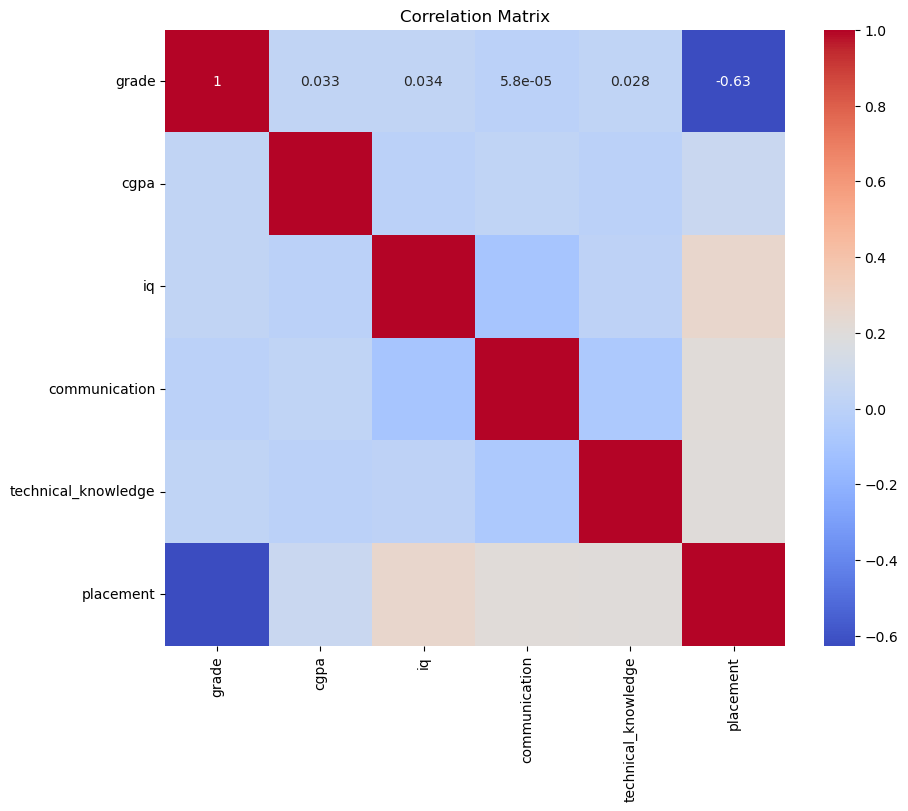

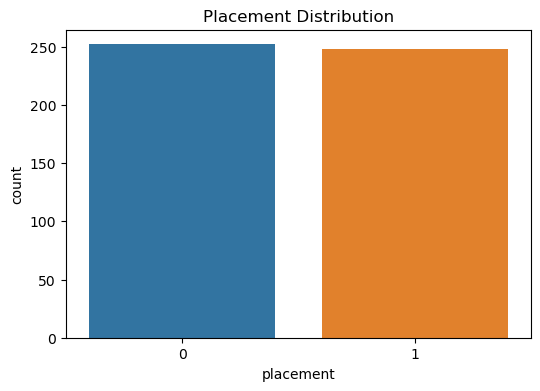

In [8]:
# Step 3: Perform exploratory data analysis (EDA)
# Display basic statistics
print("\nDataset Info:")
print(data.info())
print("\nBasic Statistics:")
print(data.describe())

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

# Visualize placement distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='placement', data=data)
plt.title('Placement Distribution')
plt.savefig('placement_distribution.png')
plt.show()

In [9]:
# Step 4: Transform data
# Define features (X) and target (y)
X = data.drop('placement', axis=1)
y = data['placement']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled

array([[-0.11382627,  0.33060702,  0.81941719, -1.52428897,  0.48940128],
       [ 1.95574224,  1.86202379,  0.127634  , -1.52428897, -0.22297322],
       [ 0.92095799,  0.93720717, -1.42887818,  0.93197779,  0.84558853],
       ...,
       [-1.14861052,  1.02670555,  0.3582284 , -0.82249847,  0.13321403],
       [ 1.95574224,  0.66871202, -1.08298658, -0.12070797, -0.22297322],
       [ 1.95574224,  1.832191  ,  0.3582284 , -1.52428897, -0.93534772]])

In [11]:
# Step 5: Split data into training and testing sets
# Using 80-20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
X_train

array([[ 0.92095799, -1.64830165,  1.16530878, -1.52428897,  1.20177578],
       [-1.14861052,  1.05653835, -1.65947258,  0.58108254,  0.48940128],
       [-1.14861052,  0.60904644,  0.3005798 , -1.52428897, -0.93534772],
       ...,
       [-0.11382627,  1.01676129, -0.1029604 ,  0.93197779,  0.84558853],
       [ 0.92095799,  1.39464335,  0.3582284 , -0.12070797,  1.20177578],
       [-0.11382627,  1.67308276, -1.08298658, -1.52428897,  0.84558853]])

In [13]:
X_test

array([[-0.11382627, -0.76326209,  0.0699854 , -0.47160322,  0.13321403],
       [ 0.92095799, -1.20080974,  1.68414618,  1.63376829, -0.22297322],
       [-1.14861052, -0.58426533,  0.127634  , -0.82249847,  0.84558853],
       [-1.14861052, -1.13119989,  0.3582284 , -1.17339372,  0.13321403],
       [ 1.95574224, -0.01744224,  1.62649758,  0.58108254,  0.13321403],
       [-0.11382627,  0.17149879,  1.16530878, -0.82249847,  1.20177578],
       [-1.14861052, -0.10694062,  1.05001159,  1.28287304, -1.64772222],
       [-1.14861052,  0.26099717,  0.1852826 ,  0.23018728,  1.55796303],
       [-1.14861052, -0.53454401, -1.19828378, -1.52428897, -0.57916047],
       [ 0.92095799,  1.53386305,  0.47352559, -0.12070797, -0.93534772],
       [ 0.92095799, -0.47487842,  1.62649758, -0.12070797, -0.93534772],
       [-0.11382627,  0.33060702, -1.37122958,  1.63376829, -0.57916047],
       [-0.11382627,  0.26099717, -1.42887818, -0.12070797, -1.29153497],
       [-0.11382627, -0.28593739, -1.5

In [14]:
y

0      0
1      0
2      0
3      1
4      1
      ..
495    1
496    1
497    1
498    0
499    0
Name: placement, Length: 500, dtype: int64

In [15]:
y_test

361    0
73     1
374    1
155    1
104    0
      ..
347    0
86     0
75     0
438    0
15     1
Name: placement, Length: 100, dtype: int64

In [16]:
# Step 6: Train model
# Initialize and train Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [17]:
# Step 7: Evaluate model
# Make predictions on test set
y_pred = nb_model.predict(X_test)

In [18]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)


Initial Model Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        51
           1       0.78      0.92      0.84        49

    accuracy                           0.83       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100



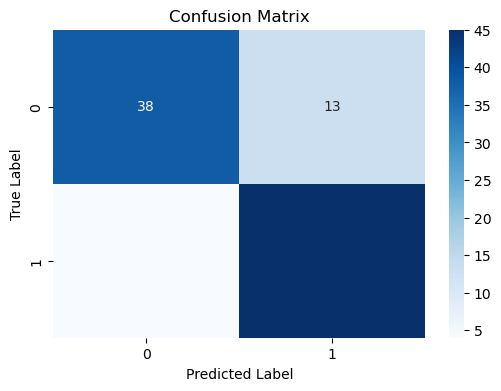

In [19]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nInitial Model Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix.png')
plt.show()

In [20]:
# Step 8: Tune hyperparameters
# Define parameter grid for GaussianNB (var_smoothing is the main parameter to tune)
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=10)
}

# Perform grid search
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)


Best Parameters: {'var_smoothing': 1.0}
Best Cross-validation Score: 0.8549999999999999


In [21]:
# Step 9: Evaluate tuned model
# Make predictions with tuned model
y_pred_tuned = best_model.predict(X_test)

# Calculate accuracy for tuned model
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print("\nTuned Model Accuracy:", tuned_accuracy)
print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))


Tuned Model Accuracy: 0.83

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        51
           1       0.78      0.92      0.84        49

    accuracy                           0.83       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100



In [22]:
# Step 10: Save model
# Save the trained model, scaler, and label encoder
joblib.dump(best_model, 'naive_bayes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')
print("\nModel, scaler, and label encoder saved successfully")


Model, scaler, and label encoder saved successfully


In [26]:
# Step 11: Test the model on unseen data
# Create a sample unseen data point with the same features as training data
unseen_data = pd.DataFrame({
    'grade': ['D'],
    'cgpa': [7.5],
    'iq': [30],
    'communication': [5],
    'technical_knowledge': [7]
})

In [27]:
unseen_data

,grade,cgpa,iq,communication,technical_knowledge
0,D,7.5,30,5,7


In [28]:
# Preprocess unseen data
unseen_data['grade'] = le.transform(unseen_data['grade'])
unseen_data_scaled = scaler.transform(unseen_data)

# Make prediction on unseen data
prediction = best_model.predict(unseen_data_scaled)
print("\nPrediction for unseen data:", "Placed" if prediction[0] == 1 else "Not Placed")

# Print prediction probability
proba = best_model.predict_proba(unseen_data_scaled)
print("Prediction Probability [Not Placed, Placed]:", proba[0])


Prediction for unseen data: Not Placed
Prediction Probability [Not Placed, Placed]: [0.92207082 0.07792918]
